In [2]:
# Import the package

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

import ydata_profiling
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression  # which will use Gradient Descent

from sklearn.model_selection  import train_test_split

In [3]:
df = pd.read_csv("C:/projects/data/input/Student_Performance.csv")

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### EDA

In [9]:
df.shape

(10000, 6)

The dataset contains 10000 rows and 6 columns

In [12]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

### Observations
### - The column names contains spaces, we replace the space with underscore

In [15]:
df.columns = df.columns.str.replace(' ','_')

In [17]:
df.columns

Index(['Hours_Studied', 'Previous_Scores', 'Extracurricular_Activities',
       'Sleep_Hours', 'Sample_Question_Papers_Practiced', 'Performance_Index'],
      dtype='object')

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous_Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep_Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample_Question_Papers_Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance_Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [21]:
df.describe(include = 'object').T

,count,unique,top,freq
Extracurricular_Activities,10000,2,No,5052


# Checking Discripancies

In [24]:
for i in (df.select_dtypes(include = 'object')):
    print(i)
    print(df[i].value_counts())
    

Extracurricular_Activities
Extracurricular_Activities
No     5052
Yes    4948
Name: count, dtype: int64


In [26]:
# Observations
# - There has no descepencies in categorical variable column

# Missing values detection

In [29]:
df.isna().sum()

Hours_Studied                       0
Previous_Scores                     0
Extracurricular_Activities          0
Sleep_Hours                         0
Sample_Question_Papers_Practiced    0
Performance_Index                   0
dtype: int64

In [31]:
# Observations
# There is no missing values observed in the data

# Checking for duplicates

In [34]:
df.duplicated().sum()

127

 - There is 127 records were duplicated
 - We will drop those duplicate records

In [37]:
df = df.drop_duplicates()

In [39]:
df.shape

(9873, 6)

 - Observations
 - There has 9873 rows and 6 columns present after droping the duplicated records

# Univariate Analysis

In [43]:
num_cols = df.select_dtypes(exclude = 'object')

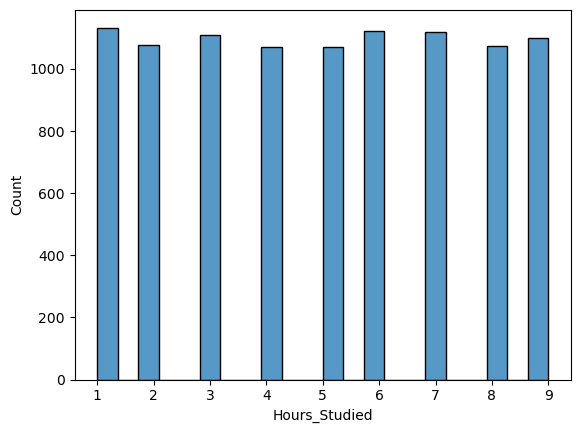

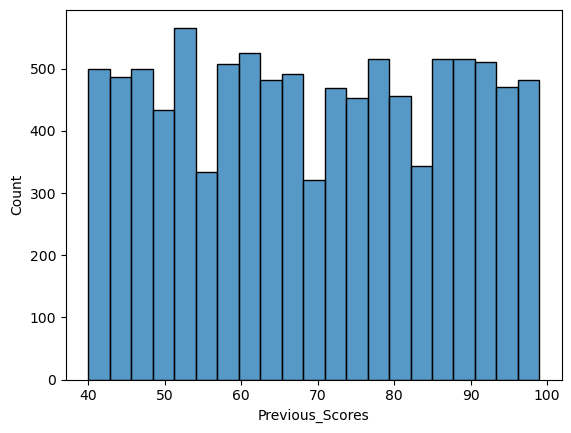

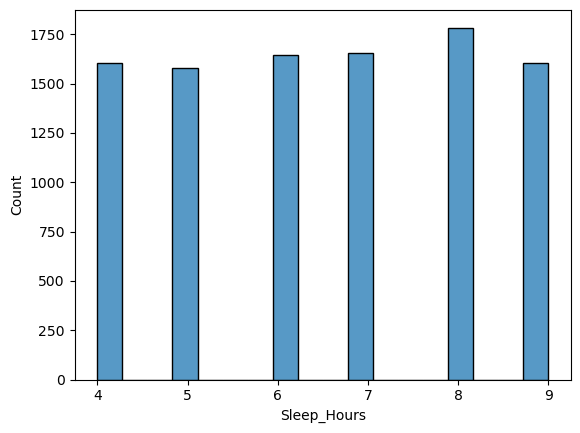

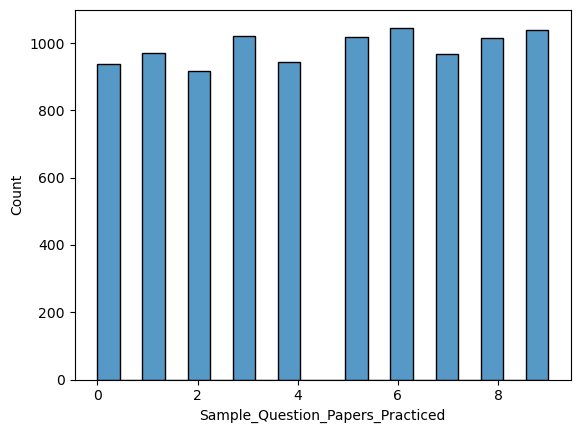

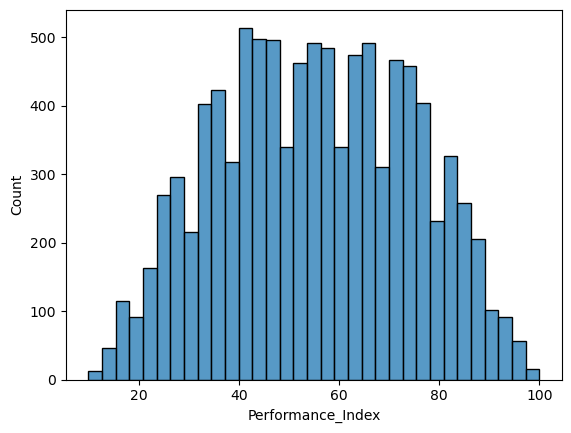

In [45]:
for i in num_cols:
    sns.histplot(data = df, x = i)
    plt.show()

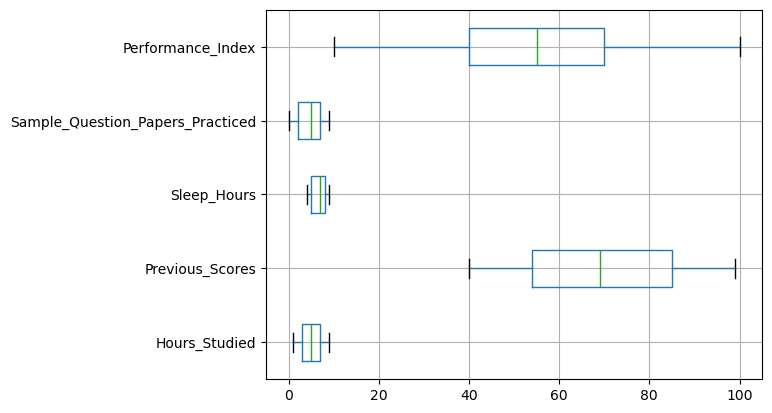

In [46]:
# Creating Boxplot for numerical variables
num_cols.boxplot(vert = 0)
plt.show()

- Observations
- There is no outliers present in the data

# Bivariate Analysis

- Finding correlation 

In [529]:
cor = num_cols.corr()

<Axes: >

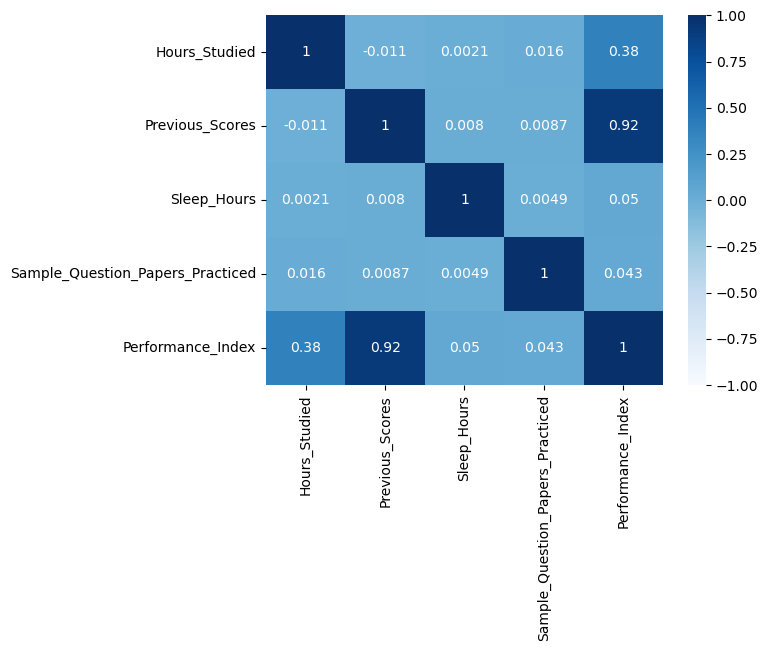

In [530]:
sns.heatmap(data =  cor,annot = True,
            vmin = -1,vmax = +1,cmap = 'Blues')

 - Observations
 - Sample_Question_papers_practiced & Previous_scores have a high correlation


- Observations
- The above plot follow Bell Curve shape, which indicates the Normality.
- The target variable following Normality

# Data Preprocessing

In [534]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [535]:
df.shape

(9873, 6)

In [536]:
# Here Extracurricular_Activities has a object data type,
# We need to convert it into numerical, for perform regression model
# now we do encoding

# Encoding

In [538]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Extracurricular_Activities'] = le.fit_transform(df['Extracurricular_Activities'])

In [539]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


# Scalling

In [542]:
x_df = df.iloc[:,0:5]
y = df.iloc[:,5]
print(y)
x_df

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance_Index, Length: 9873, dtype: float64


,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [543]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_df = ss.fit_transform(x_df)

In [545]:
x_df

array([[ 0.77556551,  1.7061685 ,  1.01007813,  1.45402483, -1.24971491],
       [-0.38320542,  0.72491187, -0.99002243, -1.49131517, -0.90092522],
       [ 1.16182248, -1.06443844,  1.01007813,  0.27588883, -0.90092522],
       ...,
       [ 0.38930853,  0.78263285,  1.01007813,  0.86495683,  0.14544385],
       [ 1.54807946,  1.59072654,  1.01007813,  0.27588883, -1.59850461],
       [ 0.77556551,  0.26314405, -0.99002243,  0.86495683, -1.24971491]])

In [546]:
data = pd.DataFrame(x_df)

In [548]:
data.head()

,0,1,2,3,4
0,0.775566,1.706168,1.010078,1.454025,-1.249715
1,-0.383205,0.724912,-0.990022,-1.491315,-0.900925
2,1.161822,-1.064438,1.010078,0.275889,-0.900925
3,0.003052,-1.006717,1.010078,-0.902247,-0.900925
4,0.775566,0.320865,-0.990022,0.864957,0.145444


In [549]:
data.columns = ['Hours_Studied','Previous_Scores','Extracurricular_Activities','Sleep_Hours','Sample_Question_Papers_Practiced']
data.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced
0,0.775566,1.706168,1.010078,1.454025,-1.249715
1,-0.383205,0.724912,-0.990022,-1.491315,-0.900925
2,1.161822,-1.064438,1.010078,0.275889,-0.900925
3,0.003052,-1.006717,1.010078,-0.902247,-0.900925
4,0.775566,0.320865,-0.990022,0.864957,0.145444


# Feature Selection

- Fitter Method -  SelectKBest
- Wrapper Method - RFE


In [552]:
from sklearn.feature_selection import SelectKBest,f_regression

In [553]:
selector = SelectKBest(score_func=f_regression, k ='all')
selector.fit(data,y)

SelectKBest(k='all', score_func=<function f_regression at 0x0000025981501BC0>)

In [555]:
feat_scores = pd.DataFrame(
    data = { 'Feature':data.columns,
            'score':selector.scores_})

In [557]:
feat_scores

,Feature,score
0,Hours_Studied,1618.585346
1,Previous_Scores,50863.230088
2,Extracurricular_Activities,6.715704
3,Sleep_Hours,25.090267
4,Sample_Question_Papers_Practiced,18.658435


In [561]:
d1 = feat_scores.sort_values(by = 'score',ascending = False).reset_index()

In [563]:
d1 = d1.drop('index',axis = 1)

In [566]:
d1

,Feature,score
0,Previous_Scores,50863.230088
1,Hours_Studied,1618.585346
2,Sleep_Hours,25.090267
3,Sample_Question_Papers_Practiced,18.658435
4,Extracurricular_Activities,6.715704


In [569]:
#- Observations
# As per the SelectKBest, we eleminate low scores,
# from the above, Dataframe We observe, Extracurricular_Activites has got low score

In [570]:
# wrapper method (Recursive feature Elimination)

In [571]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [572]:
model =LinearRegression()

In [573]:
rfe = RFE(estimator = model, n_features_to_select = 4)

In [576]:
rfe.fit(data,y)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [578]:
pd.DataFrame(data = {
    'Feature':data.columns,
    'Ranking':rfe.ranking_})

,Feature,Ranking
0,Hours_Studied,1
1,Previous_Scores,1
2,Extracurricular_Activities,2
3,Sleep_Hours,1
4,Sample_Question_Papers_Practiced,1


 - Observations
 - we observe, Hours_studied,Previous_Scores,sleep_hours, Sample_questons_papers_practiced got 1 rank, 
 - only Extracurricular activities got 2 rank

In [582]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [584]:
import statsmodels.formula.api as smf

In [585]:
def vif_cal(z):
    x_var = z
    xvar_names = z.columns
    vif = pd.DataFrame()
    for i in range(0,xvar_names.shape[0]):
        y=x_var[xvar_names[i]]
        x=x_var[xvar_names.drop(xvar_names[i])]
        rsq = smf.ols(formula = 'y~x', data =x_var).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i], 'VIF = ' , vif)
        

In [586]:
data.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced
0,0.775566,1.706168,1.010078,1.454025,-1.249715
1,-0.383205,0.724912,-0.990022,-1.491315,-0.900925
2,1.161822,-1.064438,1.010078,0.275889,-0.900925
3,0.003052,-1.006717,1.010078,-0.902247,-0.900925
4,0.775566,0.320865,-0.990022,0.864957,0.145444


In [587]:
vif_cal(z =data[['Hours_Studied','Previous_Scores','Extracurricular_Activities','Sleep_Hours','Sample_Question_Papers_Practiced']])

Hours_Studied VIF =  1.0
Previous_Scores VIF =  1.0
Extracurricular_Activities VIF =  1.0
Sleep_Hours VIF =  1.0
Sample_Question_Papers_Practiced VIF =  1.0


 - Obeservations
 - Based on VIF, we observed very low multicollinearity

# Splitting the Data

In [591]:
data

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced
0,0.775566,1.706168,1.010078,1.454025,-1.249715
1,-0.383205,0.724912,-0.990022,-1.491315,-0.900925
2,1.161822,-1.064438,1.010078,0.275889,-0.900925
3,0.003052,-1.006717,1.010078,-0.902247,-0.900925
4,0.775566,0.320865,-0.990022,0.864957,0.145444
...,...,...,...,...,...
9868,-1.541976,-1.179880,1.010078,-1.491315,-0.900925
9869,0.775566,-0.314066,1.010078,0.864957,0.145444
9870,0.389309,0.782633,1.010078,0.864957,0.145444
9871,1.548079,1.590727,1.010078,0.275889,-1.598505


In [592]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance_Index, Length: 9873, dtype: float64

In [593]:
X = data
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance_Index, Length: 9873, dtype: float64

In [594]:
from sklearn.model_selection import train_test_split

In [595]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 9)

In [596]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7898, 5) (7898,)
(1975, 5) (1975,)


# Model Building

 - STEPS IN MODEL BUILIDING
 - import model
 - fit the model to the training as well as testing
 - make predictions
 - evaluate the model

In [599]:
model = LinearRegression()
l1 = model.fit(X_train,y_train)
l1

LinearRegression()

In [600]:
# Finding the coeffients

In [601]:
for idx, col in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col,model.coef_[idx]))

The coefficient for Hours_Studied is 7.370544600973071
The coefficient for Previous_Scores is 17.636669880489663
The coefficient for Extracurricular_Activities is 0.3025549640167736
The coefficient for Sleep_Hours is 0.821572731963143
The coefficient for Sample_Question_Papers_Practiced is 0.558765647456475


In [608]:
# Finding the Intercept

In [609]:
# Let us check the intercept for the model
intercept = model.intercept_
print('The intercept for our model is {}'.format(intercept))

The intercept for our model is 55.21318110998081


In [610]:
# Predicting the test variables

In [611]:
l1.predict(X_train)

array([80.22848032, 82.58898753, 83.20029965, ..., 66.68546453,
       18.93935325, 82.58939617])

In [612]:
predict_train = pd.DataFrame()
predict_train['actual'] = y_train
predict_train['prediction'] = l1.predict(X_train)
predict_train

,actual,prediction
961,77.0,80.228480
4570,86.0,82.588988
9625,79.0,83.200300
8066,57.0,57.270900
5775,54.0,56.310515
...,...,...
6248,20.0,17.347553
501,82.0,78.216872
6841,67.0,66.685465
4469,16.0,18.939353


In [613]:
# Calculating the error for predictions

In [614]:
predict_train['residual'] = predict_train['actual'] - predict_train['prediction']

In [615]:
predict_train

,actual,prediction,residual
961,77.0,80.228480,-3.228480
4570,86.0,82.588988,3.411012
9625,79.0,83.200300,-4.200300
8066,57.0,57.270900,-0.270900
5775,54.0,56.310515,-2.310515
...,...,...,...
6248,20.0,17.347553,2.652447
501,82.0,78.216872,3.783128
6841,67.0,66.685465,0.314535
4469,16.0,18.939353,-2.939353


In [616]:
mse_train = mean_squared_error(y_train,predict_train['prediction'])
print(mse_train)

4.164618488331783


In [617]:
mse_train**0.5

2.0407396914677243

In [618]:
np.sqrt(mse_train)

2.0407396914677243

### Our model MSE on train data set is 4.1646 and RMSE is 2.040

In [620]:
predict_train.residual.mean()

-1.7714087702097206e-15

# fit the model for training

In [622]:
l1 = model.fit(X_test,y_test)
l1

LinearRegression()

In [623]:
predict_test = pd.DataFrame()
predict_test['actual'] = y_test
predict_test['prediction'] = l1.predict(X_test)
predict_test

,actual,prediction
3195,65.0,64.335915
2543,60.0,63.049620
4101,91.0,92.719301
1222,51.0,49.554673
6249,59.0,55.140917
...,...,...
3364,70.0,69.807205
1638,75.0,72.743444
9540,54.0,50.693129
2125,81.0,80.825609


In [624]:
predict_test['residual'] = predict_test['actual'] - predict_test['prediction']

In [625]:
predict_test

,actual,prediction,residual
3195,65.0,64.335915,0.664085
2543,60.0,63.049620,-3.049620
4101,91.0,92.719301,-1.719301
1222,51.0,49.554673,1.445327
6249,59.0,55.140917,3.859083
...,...,...,...
3364,70.0,69.807205,0.192795
1638,75.0,72.743444,2.256556
9540,54.0,50.693129,3.306871
2125,81.0,80.825609,0.174391


In [626]:
mse_test = mean_squared_error(y_test,predict_test['prediction'])
print(mse_test)

4.213723503001603


In [627]:
np.sqrt(mse_test)

2.052735614491453

In [628]:
from sklearn.metrics import r2_score

In [629]:
train_score = r2_score(y_train,predict_train['prediction'])
print("The r2_scorefor the train data set is",{train_score})

The r2_scorefor the train data set is {0.9887287307569751}


In [630]:
test_score = r2_score(y_test,predict_test['prediction'])
print("The r2_scorefor the test data set is",{test_score})

The r2_scorefor the test data set is {0.9885090771637994}


C:\Users\hp\AppData\Local\Temp\ipykernel_14912\1859968488.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predict_test['residual'])


<Axes: xlabel='residual', ylabel='Density'>

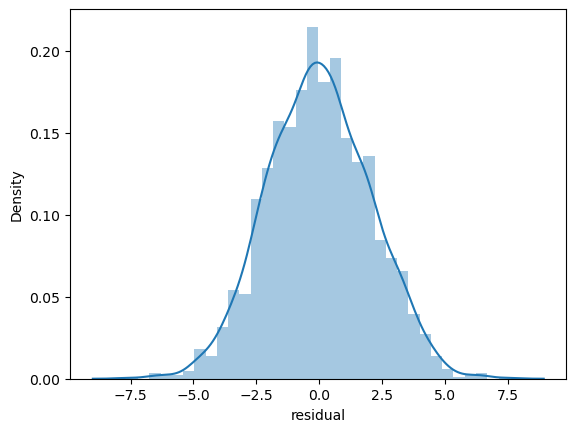

In [631]:
sns.distplot(predict_test['residual'])

Text(0.5, 1.0, 'Q-Q Plot for Residual Normality Check')

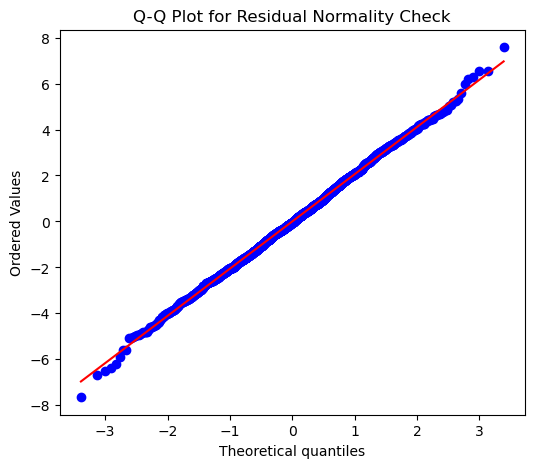

In [632]:
plt.figure(figsize=(6, 5))
stats.probplot(predict_test['residual'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Residual Normality Check")

# Based on regression assumption, our model follow normality on  residuals

 - From the above plot, we clearly observe that, errors followed Normal Distribution
 - All the residuals points on the Q-Q plot should align closely with the diagonal reference line. - Minor deviations at the ends are usually acceptable.



# Conclusion

- Target variables is Performance Index(Score prediction)
- Algorithm : Multiple Linear Regression
- R2_score for train : 98%
- R2_score for test : 98%

- Our model accuracy in both train data set & test data set is 98%
- which means 98% good fit for the model
- Our model, captures the 98% of the data to make predictions.
- 98% of data in independent variables explains the target variable